## Задание к проекту "Поиск причин убытков бизнеса"

### Инструкция по выполнению проекта:

Необходимо выяснить причину убытков бизнеса: развлекательное приложение "Procrastinate Pro+" несёт убытки уже несколько прошлых месяцев.

Доступно:
- данные о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27;
- выгрузка покупок за этот период;
- статистика рекламных расходов. 

Нужно выяснить:
- когда пользователи начинают покупать;
- сколько денег приносит каждый клиент;
- срок окупаемости клиентов;
- факторы, отрицательно влияющие на привлечение пользователей.

Следуйте плану:

#### Шаг 1. Загрузите данные и подготовьте их к анализу 
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

#### Шаг 3. Проведите исследовательский анализ данных

Найдите минимальную и максимальную дату привлечения пользователей.

Определите:
- страны даюющие больше всего платящих пользователей;
- какими устройствами чаще всего пользуются платящие пользователи;
- каналы, дающие больше всего платящих пользователей.

#### Шаг 4. Маркетинг

Выясните:

- сколько денег потрачено всего, на каждый источник и по времени;
- среднюю стоимость привлечения одного покупателя из каждого источника.

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

При помощи LTV и ROI проанализируйте:
- общую окупаемость рекламы;
- окупаемость рекламы с разбивкой по устройствам, по странам и по рекламным каналам.

Узнайте, какие устройства, страны и рекламные каналы, оказывающие негативное влияние на окупаемость.

Дайте рекомендации для рекламного отдела. 

Окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Вы проводите анализ 01.11.2019.


#### Шаг 6. Напишите выводы


#### Описание данных
Датасет `visits_log_short` (лог сервера с информацией о посещениях сайта):

- `User Id` — уникальный идентификатор пользователя;
- `Device` — категория устройства пользовател;
- `Session start` — дата и время начала сессии;
- `Session End` — дата и время окончания сессии;
- `Channel` — идентификатор рекламного источника, из которого пришел пользователь;
- `Region` - страна пользователя.

Датасет `orders_log_short` (информация о заказах):

- `User Id` — уникальный id пользователя, который сделал заказ;
- `Event Dt` — дата и время покупки;
- `Revenue` — выручка.

Датасет `costs_short` (информация о затратах на маркетинг):

- `Channel` — идентификатор рекламного источника;
- `Dt` — дата;
- `Costs` — затраты на этот рекламный источник в этот день.

## Содержание проекта

## Шаг 1. Загрузка данных и подготовка их к анализу
#### 1.1 VISITS
#### 1.2 ORDERS
#### 1.3 COSTS

## Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии
### 2.1 Функция для создания датасета PROFILES
### 2.2 Функция для подсчёта LTV и ROI
### 2.3 Функция для подсчёта удержания
### 2.4 Функция для подсчёта конверсии
### 2.5 Функция для построения графиков LTV, ROI, CAC и динамики LTV и ROI

## Шаг 3. Исследовательский анализ данных

## Шаг 4. Маркетинг

## Шаг 5. Оценка окупаемости рекламы для привлечения пользователей
### 5.1 Общая окупаемость
### 5.2 Окупаемость в зависимости от канала привлечения
### 5.3 Окупаемость в зависимости от региона
### 5.4 Окупаемость в зависимости от устройства

## Шаг 6. Выводы
#### 6.1 Исходные датасеты
#### 6.2 Траты
#### 6.3 Окупаемость
#### 6.4 Платящие пользователи

<a id='s1'></a>
## Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pth1 = '/datasets/visits_info_short.csv'
pth2 = 'D:/procrastinate_pro_plus/visits_info_short.csv'

if os.path.exists(pth1):
    visits = pd.read_csv(pth1)
elif os.path.exists(pth2):
    visits = pd.read_csv(pth2)
else:
    print('Ошибка месторасположения csv-файла "visits_info_short"')
    
pth3 = '/datasets/orders_info_short.csv'
pth4 = 'D:/procrastinate_pro_plus/orders_info_short.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3)
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4)
else:
    print('Ошибка месторасположения csv-файла "orders_info_short"')    
    
pth5 = '/datasets/costs_info_short.csv'
pth6 = 'D:/procrastinate_pro_plus/costs_info_short.csv'

if os.path.exists(pth5):
    costs = pd.read_csv(pth5)
elif os.path.exists(pth6):
    costs = pd.read_csv(pth6)
else:
    print('Ошибка месторасположения csv-файла "costs_info_short"')      

<a id='s1.1'></a>
#### 1.1 VISITS

In [3]:
visits.info()
print()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB



,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Опишем, что мы увидели выше.

`User Id` — уникальный идентификатор пользователя, **целые числа**;  

`Region` — страна пользователя, **объекты**, **нужно сделать все буквы строчными**;  

`Device` — категория устройства пользователя, **объекты**, **нужно сделать все буквы строчными**;  

`Channel` — идентификатор рекламного источника, из которого пришел пользователь, **объекты**, **нужно сделать все буквы строчными**;  

`Session start` — дата и время начала сессии, **объекты**, **нужно привести к формату datetime**;  

`Session End` — дата и время окончания сессии, **объекты**, **нужно привести к формату datetime**;  

**Названия всех столбцов нужно привести к змеиному регистру**.

Пропусков нет.

Проверим на полные дубликаты.

In [4]:
visits.duplicated().sum()

0

Полных дубликатов нет.

Переименуем столбцы.

In [5]:
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


Избавимся от заглавных букв в столбцах `region`, `device` и `channel`.

In [6]:
for col in visits:
    try:
        visits[col] = visits[col].str.lower()
    except:
        pass
visits.head(1)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01


Приведём содержимое столбцов `session_start` и `session_end` к формату `datetime`.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Уникальные значения

In [8]:
visits['user_id'].nunique()

150008

Распределение по странам:

In [9]:
visits['region'].value_counts()

united states    207327
uk                36419
france            35396
germany           30759
Name: region, dtype: int64

Распределение по устройствам:

In [10]:
visits['device'].value_counts()

iphone     112603
android     72590
pc          62686
mac         62022
Name: device, dtype: int64

In [11]:
print('Начало cессий:', min(visits['session_start']))
print('Конец сессий:', max(visits['session_end']))

Начало cессий: 2019-05-01 00:00:41
Конец сессий: 2019-11-01 01:38:46


<a id='s1.2'></a>
#### 1.2 ORDERS

In [12]:
orders.info()
print()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB



,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


`User Id` — уникальный id пользователя, который сделал заказ, **целые числа**;

`Event Dt` — дата и время покупки, **объекты**, **нужно привести к формату datetime**;

`Revenue` — выручка, **вещественные числа**.

**Названия всех столбцов нужно привести к змеиному регистру**.

Пропусков нет.

Проверим на полные дубликаты.

In [13]:
orders.duplicated().sum()

0

Полных дубликатов нет.

Переименуем столбцы.

In [14]:
orders.columns=['user_id', 'event_dt', 'revenue']
orders.head(1)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99


Приведём содержимое столбца `event_dt` к формату `datetime`.

In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Количество уникальных юзеров:

In [16]:
orders['user_id'].nunique()

8881

Распределение по платежам:

In [17]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [18]:
print('Первая покупка состоялась:', min(orders['event_dt']))
print('Последняя покупка состоялась:', max(orders['event_dt']))

Первая покупка состоялась: 2019-05-01 00:28:11
Последняя покупка состоялась: 2019-10-31 23:56:56


Оба дейттайма находятся между крайними дейттаймами из датасета `visits`, что не противоречит логике.

<a id='s1.3'></a>
#### 1.3 COSTS

In [19]:
costs.info()
print()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB



,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


`dt` — дата, **объекты**, **нужно привести к формату date**;   

`Channel` — идентификатор рекламного источника, **объекты**, **в названии столбца и в содержимом нужно сделать все буквы строчными**;   

`costs` — затраты на этот рекламный источник в этот день, **вещественные числа**.  

Пропусков нет.

Проверим на полные дубликаты.

In [20]:
costs.duplicated().sum()

0

Полных дубликатов нет.

Избавимся от заглавных букв в столбце `Channel`.

In [21]:
costs = costs.rename(columns={'Channel': 'channel'})
costs['channel'] = costs['channel'].str.lower()
costs.head(1)

,dt,channel,costs
0,2019-05-01,faceboom,113.3


Сменим тип данных у столбца `dt`.

In [22]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d').dt.date
type(costs.loc[0, 'dt'])

datetime.date

Смена типа прошла успешно.

In [23]:
costs['channel'].value_counts()

faceboom              180
mediatornado          180
rocketsuperads        180
tiptop                180
yrabbit               180
adnonsense            180
leapbob               180
opplecreativemedia    180
wahoonetbanner        180
lambdamediaads        180
Name: channel, dtype: int64

Удивительная равномерность. Оптимизацией трат на рекламу пока что не особо занимались. Придётся нам это сделать

In [24]:
print('Дата первой рекламной траты', min(costs['dt']))
print('Дата последней рекламной траты', max(costs['dt']))

Дата первой рекламной траты 2019-05-01
Дата последней рекламной траты 2019-10-27


Как и в случае с датасетом `orders`, даты вписываются в период из датасета `visits`.

<a id='s2'></a>
## Шаг 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии

LTV (LifeTime Value) - "пожизненная ценность" клиента. Общая сумма денег, которую приносит клиент за всё рассматриваемое время. Размерность - деньги/юзер.

CAC (Customer Acquisition Cost) - стоимость привлечения клиента. Размерность - деньги/юзер.

ROI (Return On Investment) - окупаемость инвестиций. Безразмерная величина (иногда измеряют в процентах).

Retention Rate - коэффициент удержания. Показывает, сколько пользователей из когорты относительно их изначального числа вернулись (продолжили приносить выручку). Безразмерная величина (иногда измеряют в процентах).

CR (Conversion Rate) - конверсия. Это доля людей, перешедших из одного состояния в другое, например, ставших покупателями. Безразмерная величина (иногда измеряют в процентах).

<a id='s2.1'></a>
### 2.1 Функция для создания датасета PROFILES

In [25]:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате первого посещения
    # группируем по ID и находим первые значения session_start, region, device и channel
    # столбец с временем первого посещения назовём first_ts от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'region': 'first', 'device': 'first', 'channel': 'first', })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа (????????)
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')    # (????????)
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [26]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,united states,mac,faceboom,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,united states,iphone,faceboom,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,france,iphone,organic,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,germany,pc,adnonsense,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,united states,iphone,yrabbit,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,united states,iphone,tiptop,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,uk,pc,organic,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,united states,iphone,tiptop,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,united states,pc,mediatornado,2019-09-28,2019-09-01,False,0.205714


Количество строк совпадает с ранее посчитанным числов уникальных `user_id` в датасете `visits`.

In [27]:
profiles['payer'].sum()

8881

Количество платящих пользователей совпадает с ранее посчитанным числом уникальных `user_id` в датасете `orders`.

<a id='s2.2'></a>
### 2.2 Функция для подсчёта LTV и ROI

In [28]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Для применения функцции `get_ltv` нужны дата рассмотрения и горизонт.

In [29]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Когда настанет время вызывать функцию `get_ltv`, можно будет взять код из ячейки ниже и раскомментить его. В квадратные скобки аргумента `dimensions` при необходимости можно вставить признак, по которому следует разделить LTV.

In [30]:
# ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date,horizon_days, dimensions=[])

<a id='s2.3'></a>
### 2.3 Функция для подсчёта удержания

In [31]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу" 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

Функция для построения графиков

In [32]:
def plot_retention(retention):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    plt.show()

In [33]:
# ret_raw, ret_grouped, ret_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = [])
# plot_retention(ret_grouped)

<a id='s2.4'></a>
### 2.4 Функция для подсчёта конверсии

In [34]:
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Для хитмэпа

In [35]:
# conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, 
#                                                                 dimensions=[])
# plt.figure(figsize=(18, 5))
# sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
# plt.title('Тепловая карта конверсии по странам')
# plt.show() 

<a id='s2.5'></a>
### 2.5 Функция для построения графиков LTV, ROI, CAC и динамики LTV и ROI

In [36]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [37]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(18, 50))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True, ax=ax1, fontsize=16)
    plt.legend(fontsize=16)
    plt.xlabel('Лайфтайм', fontsize=20)
    plt.title('LTV', fontsize=20)

    # второй график — динамика ltv
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, fontsize=16)
    plt.legend(fontsize=16)
    plt.xlabel('Дата привлечения', fontsize=20)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=20)

    # третий график — динамика cac
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, fontsize=16)
    plt.legend(fontsize=16)
    plt.xlabel('Дата привлечения', fontsize=20)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=20)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True, ax=ax4, fontsize=16)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=16)
    plt.xlabel('Лайфтайм', fontsize=20)
    plt.title('ROI', fontsize=20)

    # пятый график — динамика roi
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5, fontsize=16)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=16)
    plt.xlabel('Дата привлечения', fontsize=20)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=20)

    plt.tight_layout()
    plt.show()

<a id='s3'></a>
## Шаг 3. Исследовательский анализ данных

Выясним минимальную и максимальную даты привлечения платящих пользователей.

In [38]:
payer_profiles = profiles.query('payer == True')
print('Минимальная дата привлечения пользователей', min(payer_profiles['dt']))
print('Максимальная дата привлечения пользователей', max(payer_profiles['dt']))

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Согласно ТЗ мы рассматриваем период с 2019-05-01 по 2019-10-27. Совпали обе даты.

Сразу напишем функцию, которая сможет распределять пользователей на платящих и неплатящих, учитывая один признак (страны, каналы привлечения или устройства), и вычислять процент платящих.

In [39]:
def spread_func(_payer, _all):
    _payer_profiles = pd.DataFrame(_payer.value_counts())
    _all_profiles = pd.DataFrame(_all.value_counts())
    _payer_profiles.columns=['sign']
    _all_profiles.columns=['sign']
    _payer_profiles = _payer_profiles.join(_all_profiles, lsuffix='_payer', rsuffix='_all')
    _payer_profiles['percentage'] = (_payer_profiles['sign_payer'] / _payer_profiles['sign_all'] * 100).round(2)
    _conclusion = _payer_profiles.drop(columns={'sign_payer', 'sign_all'}).sort_values(by='percentage', ascending=False)
    _payer_profiles = _payer_profiles.sort_values(by='percentage', ascending=False)
    return _conclusion, _payer_profiles

Посмотрим на распределение платящих и не платящих пользователей по странам. Вычислим процент платящих пользователей.

In [40]:
conclusion_region, payer_profiles_region = spread_func(payer_profiles['region'], profiles['region'])
conclusion_region.columns=['region_payer_percentage']
payer_profiles_region.columns=['region_payer', 'region_all', 'region_payer_percentage']
payer_profiles_region.sort_values(by='region_payer_percentage', ascending=False)

,region_payer,region_all,region_payer_percentage
united states,6902,100002,6.90
germany,616,14981,4.11
uk,700,17575,3.98
france,663,17450,3.80


Сделаем аналогичные операции, распределив пользователей по устройствам.

In [41]:
conclusion_device, payer_profiles_device = spread_func(payer_profiles['device'], profiles['device'])
conclusion_device.columns=['device_payer_percentage']
payer_profiles_device.columns=['device_payer', 'device_all', 'device_payer_percentage']
payer_profiles_device.sort_values(by='device_payer_percentage', ascending=False)

,device_payer,device_all,device_payer_percentage
mac,1912,30042,6.36
iphone,3382,54479,6.21
android,2050,35032,5.85
pc,1537,30455,5.05


In [45]:
conclusion_channel, payer_profiles_channel = spread_func(payer_profiles['channel'], profiles['channel'])
conclusion_channel.columns=['channel_payer_percentage']
payer_profiles_channel.columns=['channel_payer', 'channel_all', 'channel_payer_percentage']
payer_profiles_channel

Промежуточные выводы:
- в США сильно больше платящих пользователей, чем в европейских странах вместе взятых. В европейских странах примерно поровну пользователей: 700-663-616 для Великобритании-Франции-Германии;
- разрыв по количеству пользователей между `iphone` и `pc` составляет почти 2 раза в пользу `iphone`. Между ними `android` и `mac`;
- больше всего пользователей привлекли `faceboom` и `tiptop`. Следом идут огранические пользователи (которые нашли приложение сами, и за которых не пришлось платить источникам привлечения). Замыкают список источники `yrabbit` и `mediatornado`.

<a id='s4'></a>
## Шаг 4. Маркетинг

Посчитаем общие траты.

In [47]:
print('Потратили денег всего:', costs['costs'].sum().round(1))

Потратили денег всего: 105497.3


Посчитаем суммарные траты в зависимости от источника.

In [48]:
channel_costs = costs.groupby('channel').agg('sum').sort_values(by='costs', ascending=False).reset_index()
channel_costs['percentage'] = (channel_costs['costs'] / channel_costs['costs'].sum() * 100).round(2)
channel_costs

,channel,costs,percentage
0,tiptop,54751.30,51.90
1,faceboom,32445.60,30.75
2,wahoonetbanner,5151.00,4.88
3,adnonsense,3911.25,3.71
4,opplecreativemedia,2151.25,2.04
5,rocketsuperads,1833.00,1.74
6,leapbob,1797.60,1.70
7,lambdamediaads,1557.60,1.48
8,mediatornado,954.48,0.90
9,yrabbit,944.22,0.90


Очень большие проценты трат у источников `tiptop` и `faceboom`. Это настораживает.

Построим график трат в зависимости от времени.

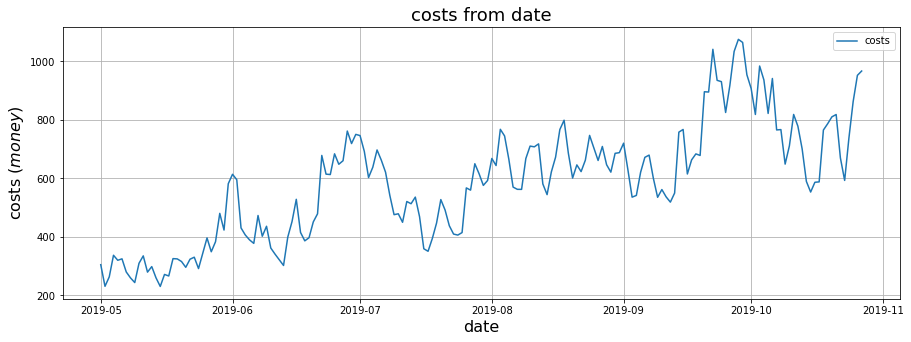

In [49]:
costs.pivot_table(index='dt', values='costs', aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.xlabel('date', fontsize=16)
plt.ylabel('costs ($money$)', fontsize=16)
plt.title('costs from date', fontsize=18)
plt.show()

Построим тот же график трат в зависимости от времени, но с накоплением для каждого источника привлечения.

<AxesSubplot:xlabel='dt'>

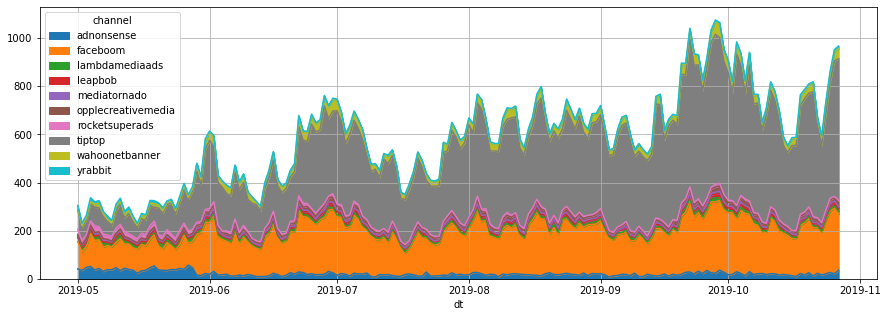

In [50]:
costs.pivot_table(index='dt', values='costs', columns='channel', aggfunc='sum').plot.area(figsize=(15, 5), grid=True)

Чтобы посчитать, сколько в среднем нужно потратить денег для привлечения одного покупателя (`payer=True`), сгруппируем датасет 
`payer_profiles` по источникам, при этом просуммируем `payer`(это всё равно, что складывать единицы). Получившийся датасет объединим по источникам с датасетом `channel_costs`. Для вычисления трат на привлечение одного покупателя в зависимости от источника разделим значения столбца `costs` на значения столбца `payer`.

In [51]:
channel_payer_costs = payer_profiles.groupby('channel').agg({'payer': 'sum'}).merge(channel_costs, on='channel')
channel_payer_costs['costs_per_payer'] = (channel_payer_costs['costs'] / channel_payer_costs['payer']).round(2)
channel_payer_costs.sort_values(by='costs_per_payer', ascending=False)

,channel,payer,costs,percentage,costs_per_payer
7,tiptop,1878,54751.30,51.90,29.15
8,wahoonetbanner,453,5151.00,4.88,11.37
5,opplecreativemedia,233,2151.25,2.04,9.23
1,faceboom,3557,32445.60,30.75,9.12
0,adnonsense,440,3911.25,3.71,8.89
2,lambdamediaads,225,1557.60,1.48,6.92
3,leapbob,262,1797.60,1.70,6.86
4,mediatornado,156,954.48,0.90,6.12
9,yrabbit,165,944.22,0.90,5.72
6,rocketsuperads,352,1833.00,1.74,5.21


In [52]:
channel_all_costs = profiles.groupby('channel').agg({'user_id': 'nunique'}).merge(channel_costs, on='channel')
channel_all_costs = channel_all_costs.rename(columns={'user_id': 'users', 'percentage': 'costs_per_user'})
channel_all_costs['costs_per_user'] = (channel_all_costs['costs'] / channel_all_costs['users']).round(2)
channel_all_costs.sort_values(by='costs_per_user', ascending=False)

,channel,users,costs,costs_per_user
7,tiptop,19561,54751.30,2.80
1,faceboom,29144,32445.60,1.11
0,adnonsense,3880,3911.25,1.01
2,lambdamediaads,2149,1557.60,0.72
8,wahoonetbanner,8553,5151.00,0.60
6,rocketsuperads,4448,1833.00,0.41
5,opplecreativemedia,8605,2151.25,0.25
4,mediatornado,4364,954.48,0.22
9,yrabbit,4312,944.22,0.22
3,leapbob,8553,1797.60,0.21


In [53]:
print('Средний САС:', channel_all_costs['costs_per_user'].mean())

Средний САС: 0.755


Промежуточные выводы:
- рекордсмен по тратам - канал привлечения `tiptop`: почти 52% трат приходится на него. На втором месте канал `faceboom`: почти 31%. На каждый из остальных каналов приходится от 1 до 5% трат. 
- рекордсмен по тратам на одного платящего пользователя - снова `tiptop`, трат почти в три раза больше, чем у второго номера - канала `wahoonetbanner`. Далее идёт плавное снижение трат. Траты важный показатель, поэтому каналы, на которые приходится больше трат, нужно оценивать более строго;
- рекордсмен по тратам на одного пользователя (неважно, платящего или нет) - снова `tiptop`, трат опять почти в три раза больше, чем у второго номера - канала `faceboom`;
- судя по графику, за полгода траты выросли кратно (в 3-5 раз), что очень нехорошо. 

<a id='s5'></a>
## Шаг 5. Оценка окупаемости рекламы для привлечения пользователей

<a id='s5.1'></a>
### 5.1 Общая окупаемость

Проанализируем общую окупаемость рекламы. Для этого вызовем функцию `get_ltv`. Затем пробежимся по полученным датасетам в поисках явных ошибок.

In [54]:
profiles = profiles.query('channel != "organic"')

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[])

In [56]:
ltv_raw.head(3)

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost,event_dt,revenue,lifetime,cohort
0,599326,2019-05-07 20:58:57,united states,mac,faceboom,2019-05-07,2019-05-01,True,1.088172,2019-05-07 20:59:09,4.99,0.0,All users
1,599326,2019-05-07 20:58:57,united states,mac,faceboom,2019-05-07,2019-05-01,True,1.088172,2019-05-08 06:01:28,4.99,0.0,All users
2,599326,2019-05-07 20:58:57,united states,mac,faceboom,2019-05-07,2019-05-01,True,1.088172,2019-05-09 07:34:01,4.99,1.0,All users


In [57]:
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


In [58]:
ltv_history.head(3)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,390,0.294282,0.383846,0.435026,0.514359,0.565538,0.565538,0.578333,0.603923,0.680692,0.757538,0.808718,0.872692,0.885487,0.898282
2019-05-02,323,0.324427,0.618235,0.664582,0.757276,0.803622,0.880898,0.911796,0.942693,1.004489,1.035387,1.081734,1.081734,1.112632,1.158978
2019-05-03,346,0.305751,0.452861,0.568237,0.669191,0.943468,0.986734,1.001156,1.001156,1.073266,1.116532,1.130954,1.203064,1.260751,1.304017


In [59]:
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


In [60]:
roi_history.head(3)

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-05-01,390,0.781590,0.376517,0.491110,0.556591,0.658093,0.723575,0.723575,0.739945,0.772686,0.870907,0.969228,1.034709,1.116561,1.132931,1.149301
2019-05-02,323,0.714690,0.453941,0.865039,0.929888,1.059585,1.124434,1.232559,1.275791,1.319024,1.405489,1.448721,1.513570,1.513570,1.556802,1.621651
2019-05-03,346,0.760318,0.402136,0.595621,0.747368,0.880146,1.240886,1.297791,1.316760,1.316760,1.411601,1.468506,1.487475,1.582316,1.658190,1.715095


Явных ошибок не видно. Пора построить графики LTV, динамики LTV, динамики CAC, ROI, динамики ROI.

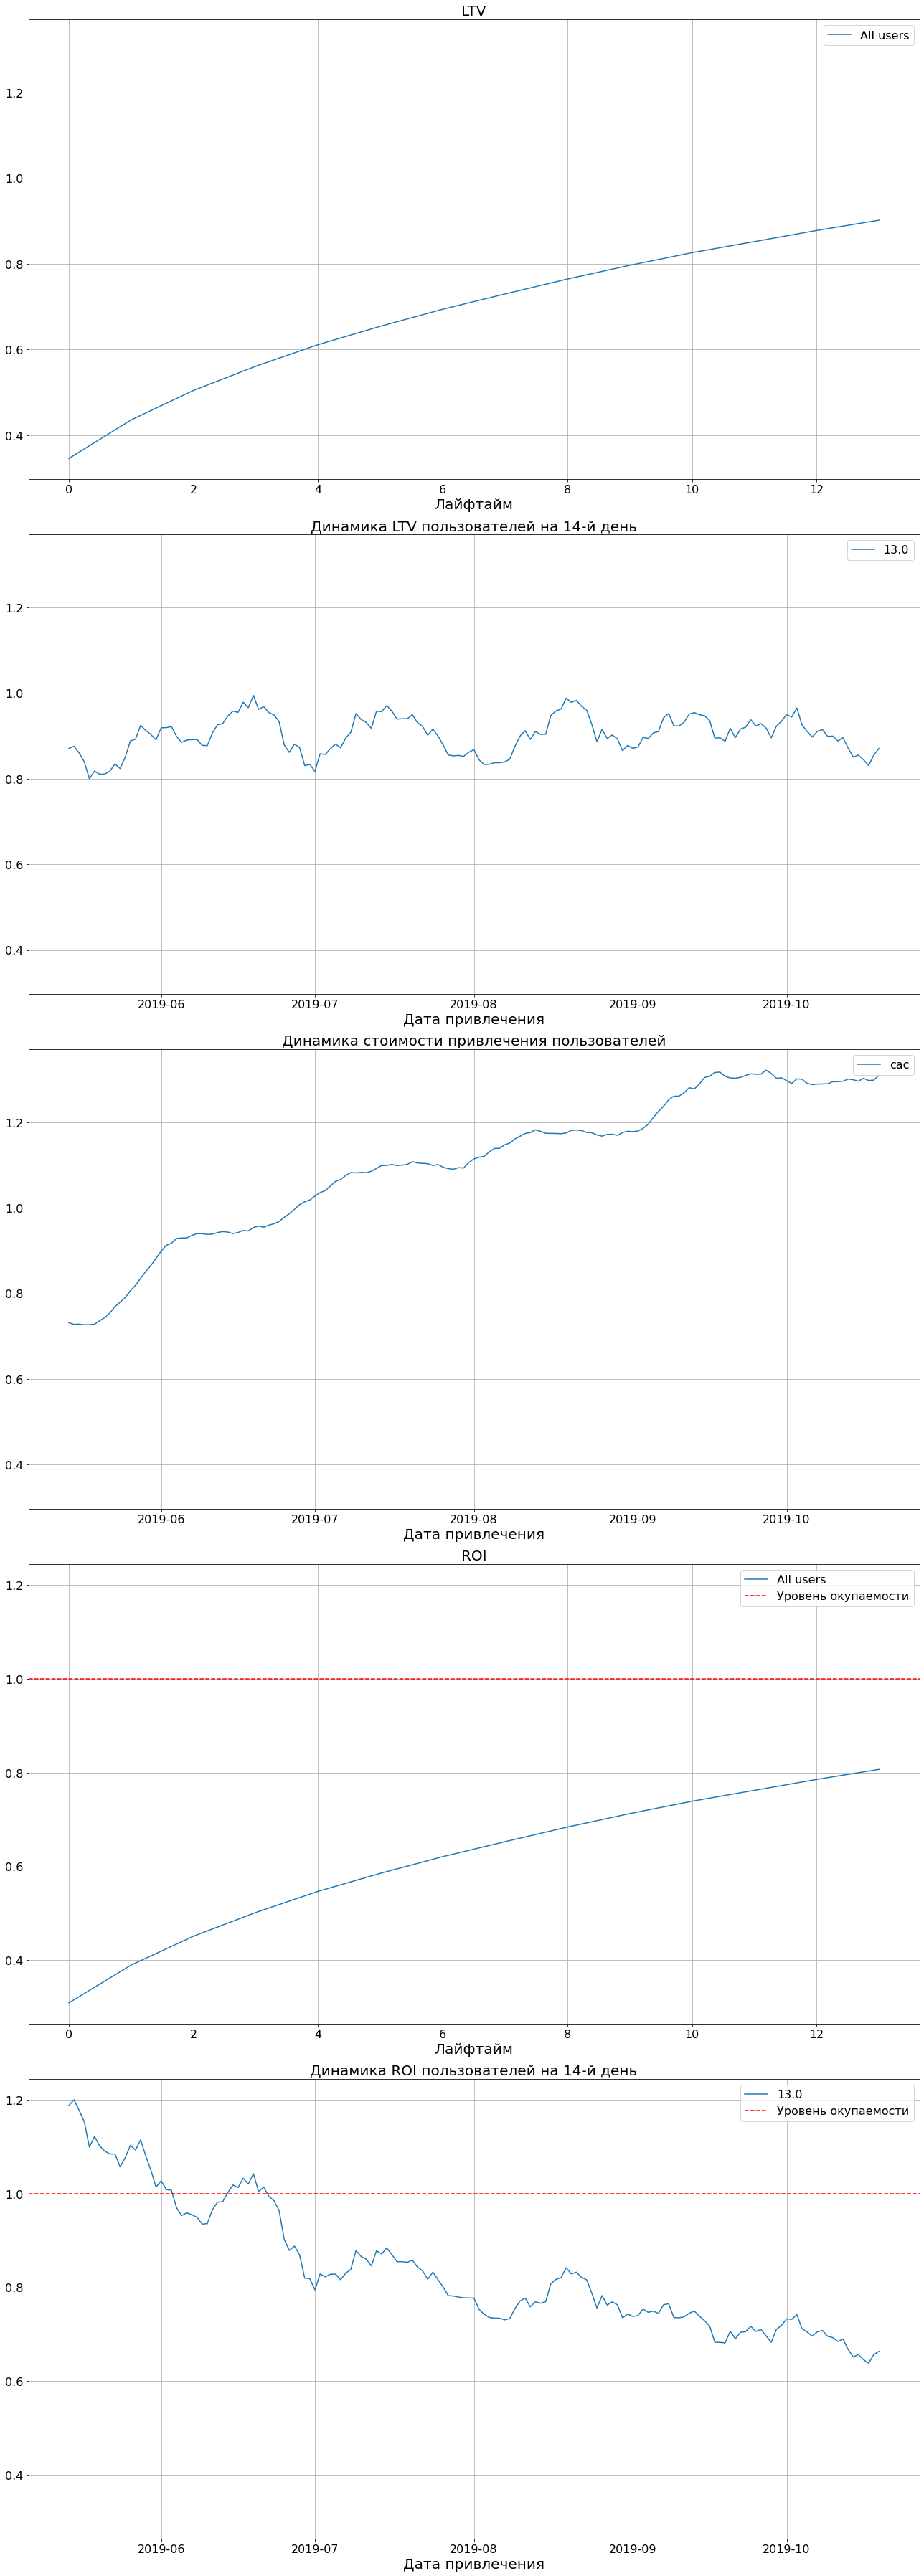

In [61]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

График LTV. С течением времени общая LTV плавно растёт, что логично.

График динамики LTV. Ближе к концу мая происходит резкий кратный рост расходов. С июня расходы медленно, но верно продолжают расти. Эта ситуация заслуживает пристального внимания. Нужно узнать её причины.

График САС. Стоимость привлечения выросла почти в 3 раза, это недопустимо. 

График ROI. ROI растёт, но не пересекает линию окупаемости.

График динамики ROI. Окупаемость обратно пропорциональна  САС, так что её сильное падение не должно нас удивлять.

Как происходит удержание? Построим два графика: для платящих и неплатящих пользователей.

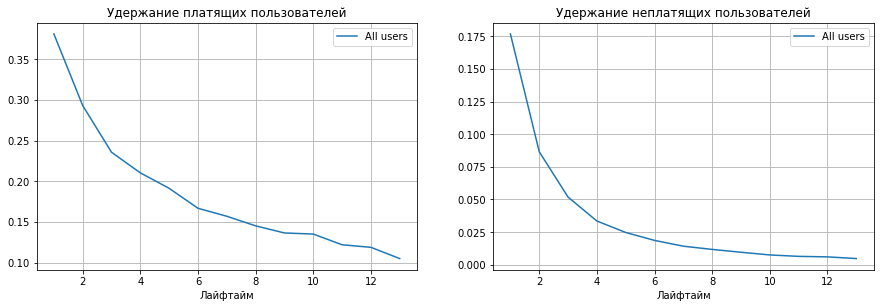

In [62]:
ret_raw, ret_grouped, ret_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = [])
plot_retention(ret_grouped)

Удержание падает экспоненциально. Для платящих пользователей удержание сильно выше, чем для неплатящих, что является нормой.

<a id='s5.2'></a>
### 5.2 Окупаемость в зависимости от канала привлечения

И сразу же посмотрим на конверсию.

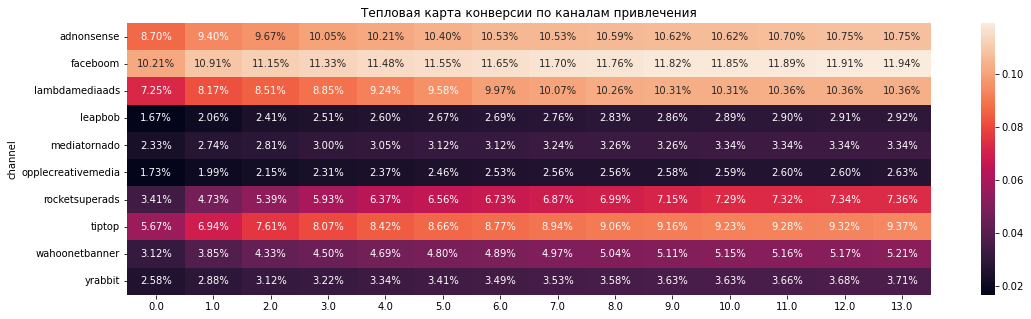

In [63]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, 
                                                                dimensions=['channel'])
plt.figure(figsize=(18, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам привлечения')
plt.show() 

In [64]:
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
adnonsense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
faceboom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
lambdamediaads,2056,0.072471,0.081712,0.085117,0.088521,0.092412,0.095817,0.099708,0.100681,0.102626,0.103113,0.103113,0.103599,0.103599,0.103599
leapbob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
mediatornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
opplecreativemedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
rocketsuperads,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
tiptop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
wahoonetbanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091


Лучше всех на старте каналы привлечения `adnonsense` и `faceboom`, но прирост по процентным пунктам низкий . Неплохие результаты у канала `lambdamediaads`. Хороший прирост у каналов `rocketsuperads` и `tiptop`.

Что с удержанием?

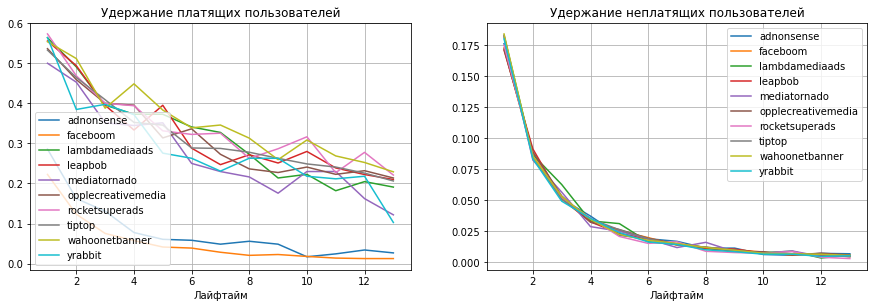

In [65]:
ret_raw, ret_grouped, ret_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['channel'])
plot_retention(ret_grouped)

Очень низкое удержание у источников `faceboom` и `adnonsense`, но только у платящих пользователей. Это странно.

Четыре фактора: 
- высокая конверсия на старте (1);
- очень слабый рост конверсии (2);
- очень плохое удержание у платящих пользователей (3);
- такое же как и остальных источников удержание у неплатящих пользователей (4).

Выскажем предположение. Реклама в источниках `faceboom` и `adnonsense` побуждает много (относительно других источников) новых пользователей раскошелиться (1), но потом эти пользователи быстро разочаровываются в приложении и уходят(3). В то же время те, кто не стали платить сразу, не стали платить и потом (почти не стали, всё-таки небольшой рост конверсии есть) (2). Причём приложением они остались довольны в той же степени, что и неплатящие пользователи, пришедшие из других источников (4). Возможно, реклама в `faceboom` и `adnonsense` каким-то вводит в заблуждение потенциальных пользователей, обещая им неслыханный функционал, если те заплатят сразу. Потом они понимают, что реальность не соответствует их ожиданиям, и уходят. А часть из них наверняка ещё и оставляет негативный отзыв, что в конечном счёте вносит свой негативный вклад в выручку.

Удержание у остальных источников плюс-минус похожее.

Построим графики LTV, динамики LTV, динамики CAC, ROI, динамики ROI с разбивкой **по каналам привлечения**.

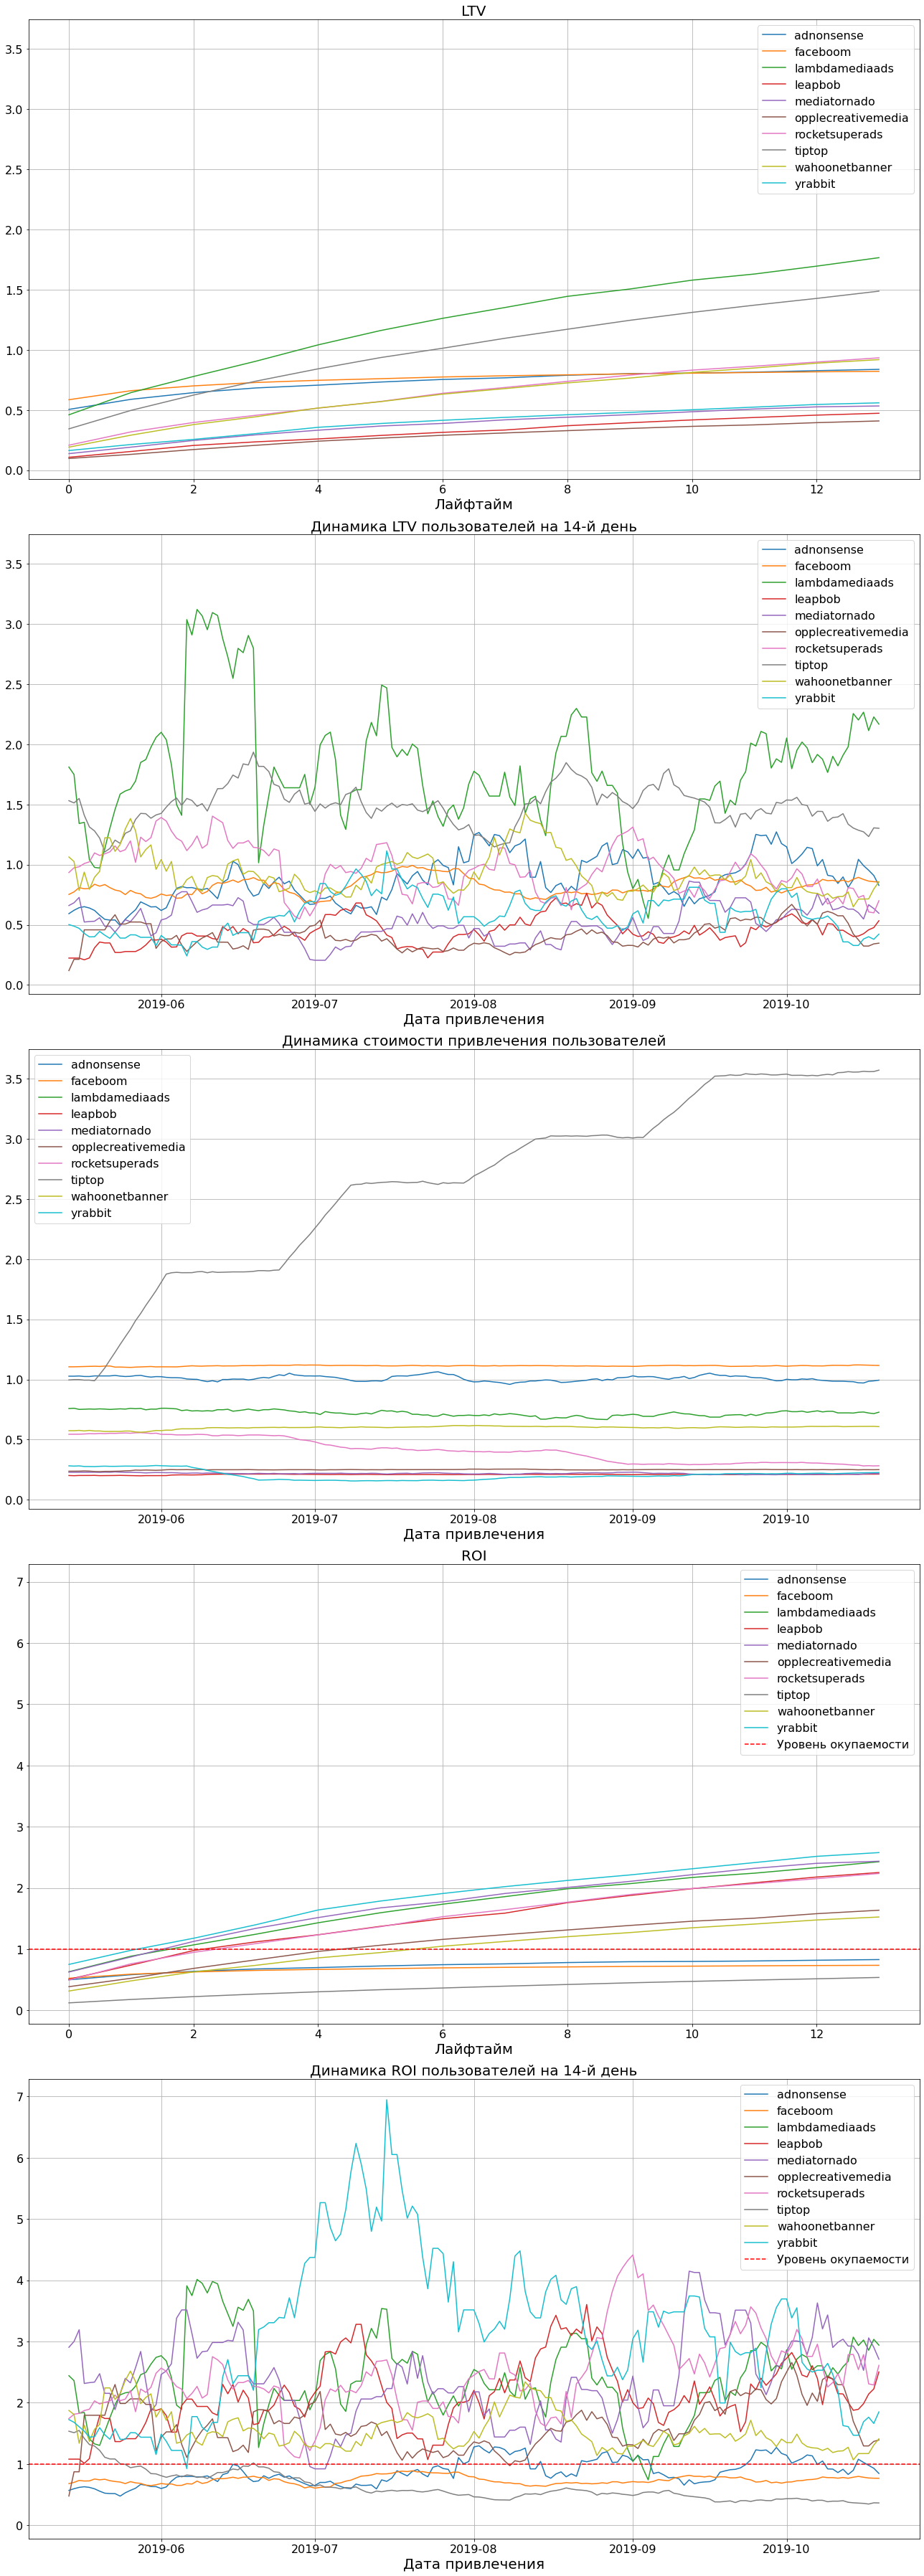

In [66]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

**График LTV.** Больше всего денег за две недели успевают принести пользователи, привлечённые через канал `lambdamediaads`. На втором месте канал `tiptop` (но хвалить мы его не будем из-за неоднокраного повышения САС). Самые скромные результаты у органических пользователей, но они всё же достались приложению бесплатно, так что не будем многого от них требовать.

**График динамики LTV.** В динамике за весь рассматриваемый период в явных лидерах те же два канала.

**График САС.** Здесь сразу бросается в глаза неоднократное резкое повышение САС у источника привлечения `tiptop`, что однозначно не идёт на пользу приложению. Хоть выше этот канал и отметился высоким приростом конверсии, такое большое повышение цены за рекламу не может быть этим оправдано.

**График ROI.** Каналы `adnonsense`, `faceboom` и `tiptop` не успевают окупиться за две недели. Остальные каналы успевают за одну.

**График динамики ROI.** Начав с самого низкого уровня ROI, самым успешным в итоге оказался канал `yrabbit`. Пару раз (именно на этой визуализации ROI) он единственный даже пересекал уровень окупаемости. Но если взглянуть на картину в целом, то ни один источник и близко нельзя назвать удачным с точки зрения ROI.

<a id='s5.3'></a>
### 5.3 Окупаемость в зависимости от региона

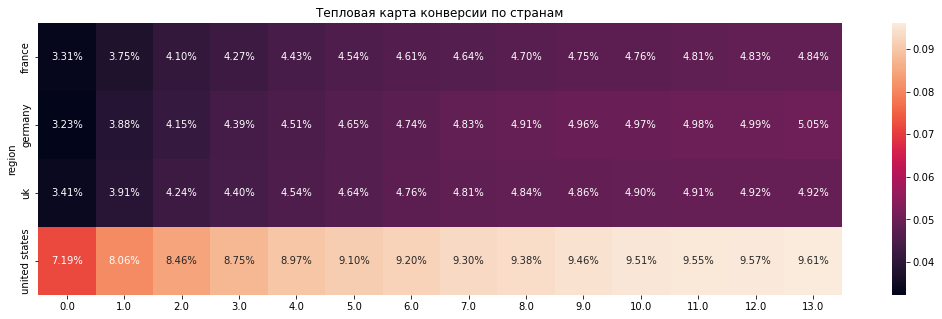

In [67]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, 
                                                                dimensions=['region'])
plt.figure(figsize=(18, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show() 

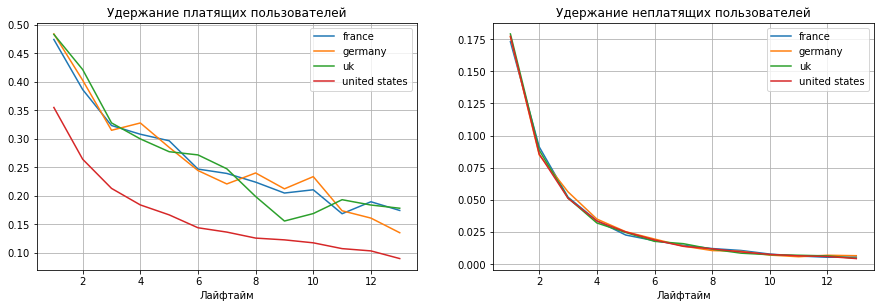

In [68]:
ret_raw, ret_grouped, ret_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['region'])
plot_retention(ret_grouped)

Конверсия и удержание в США ведут себя так же как вели себя каналы привлечения `adnonsense` и `faceboom`, когда мы изучали конверсию и удержание в зависимости от каналов. Может быть, эти два канала показывают рекламу преимущественно в США? Проверим.

In [69]:
profiles.loc[profiles['region'] == 'united states', 'channel'].value_counts()

faceboom          29144
tiptop            19561
rocketsuperads     4448
mediatornado       4364
yrabbit            4312
Name: channel, dtype: int64

In [70]:
profiles.loc[profiles['region'] != 'united states', 'channel'].value_counts()

opplecreativemedia    8605
leapbob               8553
wahoonetbanner        8553
adnonsense            3880
lambdamediaads        2149
Name: channel, dtype: int64

Итак, мы обнаружили, что каналы привлечения для США и Европы вообще не пересекаются ~~(`organic` не в счёт)~~. Причём два из трёх проблемных канала (`faceboom` и `tiptop`) функционируют именно в США.

На всякий случай узнаем, какие каналы привлечения используются для остальных стран.

In [71]:
uk_channels = pd.DataFrame(profiles.loc[profiles['region'] == 'uk', 'channel'].value_counts())
france_channels = pd.DataFrame(profiles.loc[profiles['region'] == 'france', 'channel'].value_counts())
germany_channels = pd.DataFrame(profiles.loc[profiles['region'] == 'germany', 'channel'].value_counts())

euro_channels = uk_channels.join(france_channels, lsuffix='_uk', rsuffix='_fra', how='outer')\
.join(germany_channels, how='outer').rename(columns={'channel': 'channel_ger'}).sort_values(by='channel_uk', ascending=False)

euro_channels

,channel_uk,channel_fra,channel_ger
opplecreativemedia,3052,2991,2562
leapbob,3046,2988,2519
wahoonetbanner,3003,2971,2579
adnonsense,1295,1366,1219
lambdamediaads,758,742,649


Распределение по каналам между европейскими странами очень равномерное. Возможно, это даже было сделано специально. Мы же можем сделать вывод, что, говоря о США, мы говорим о каналах `faceboom`, `tiptop`, `rocketsuperads`, `mediatornado`, `yrabbit`. И наоборот, говоря о вышеперечисленных каналах, мы говорим только о США. А когда речь идёт о каналах `opplecreativemedia`, `leapbob`, `wahoonetbanner`, `adnonsense`, `lambdamediaads`, то рассматриваются европейские страны.

Помня про всё вышесказанное, посмотрим на LTV, CAC и ROI.

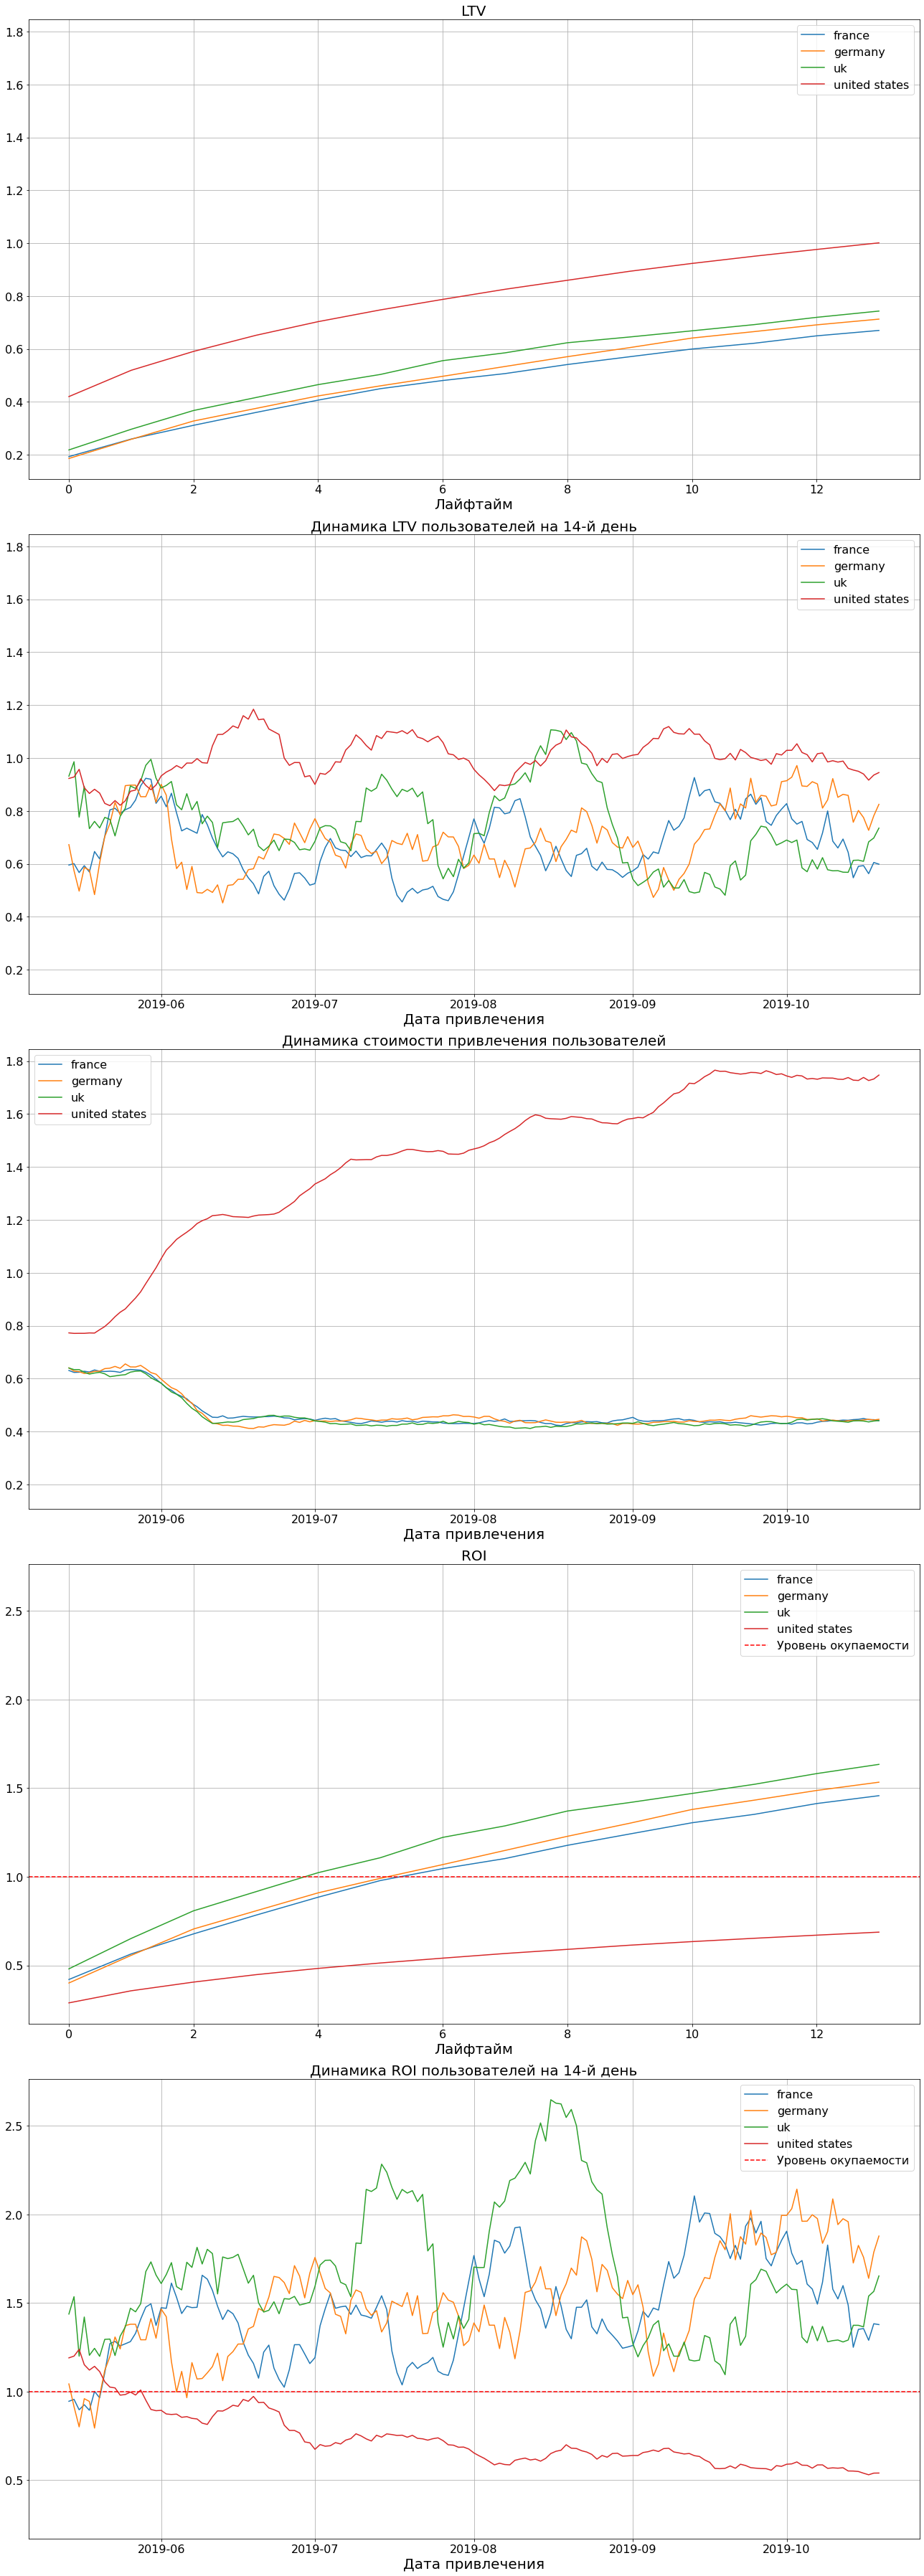

In [72]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

**График LTV.** Пользователи в США приносят стабильно денег больше, чем остальные. Чуть хуже всех европейцев приносит выручку Франция.

**График динамики LTV.** США снова в лидерах.

**График САС.** Здесь сразу бросается в глаза неоднократное резкое повышение САС у ~~источника привлечения `tiptop`~~ США, что однозначно не идёт на пользу приложению. Хоть выше ~~этот канал~~ эта страна и отметилась высоким приростом конверсии, такое большое повышение цены за рекламу не может быть этим оправдано.

**График ROI.** Европейцы окупаются за 3-5 дней, а американцы не успевают окупиться за 2 недели.

**График динамики ROI.** Из-за непомерной САС в США страдает ROI. С конца июля одни убытки.

Пока что не выясненными остаются причины того, почему средний пользователь из США приносит больше денег. Может быть, для американцев просто установлены цены выше, чем для европейцев? Проверим распределение цен. Если гипотеза верна, то мы, к примеру, можем не увидеть `revenue = 4.99` среди покупок из США.

In [73]:
revenue_check = orders.merge(visits, on='user_id', how='left')
revenue_check.loc[revenue_check['region'] == 'united states', 'revenue'].value_counts()

4.99     391323
5.99       8070
9.99       3697
49.99      2168
19.99      1657
Name: revenue, dtype: int64

In [74]:
revenue_check.loc[revenue_check['region'] != 'united states', 'revenue'].value_counts()

4.99     194841
5.99       3625
9.99       2120
19.99      1328
49.99      1125
Name: revenue, dtype: int64

Цены установлены такие же, но американцы значительно охотнее совершают покупки на самую большую сумму: 49.99. Это очень позитивно влияет на LTV. Один такой покупатель в ~10 раз ценнее для приложения, чем тот, кто платит минимальную сумму.

Можно было бы расчитать долю покупок на 49.99, но тогда бы пришлось учитывать долю остальных покупок и их значимость, а это по сути дублирование расчёта LTV. Так что остановимся.

<a id='s5.4'></a>
### 5.4 Окупаемость в зависимости от устройства

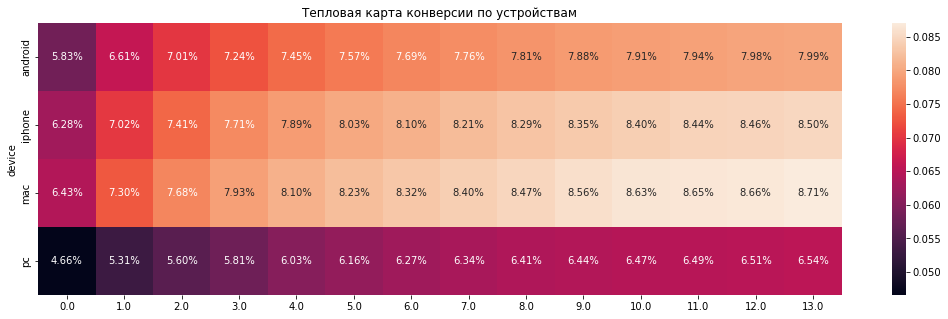

In [75]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, 
                                                                dimensions=['device'])
plt.figure(figsize=(18, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

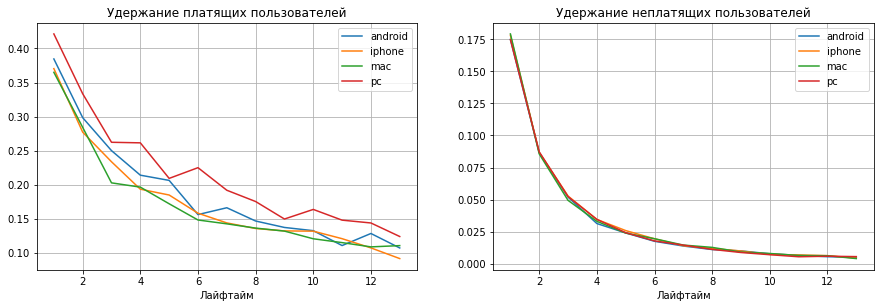

In [76]:
ret_raw, ret_grouped, ret_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['device'])
plot_retention(ret_grouped)

Владельцы `mac`, `iphone`, `android`, `pc`. Так выглядит рейтинг прокрастинаторов, решивших заплатить за приложение. Учитывая, что владельцы `mac` и `iphone` считаются более платёжеспособными, чем обладатели `android` и `pc`, именно такой рейтинг нас ничуть не удивил.

По удержанию картина нормальная. Чуть более верными среди плательщиков являются пользователи `pc` ("олды", скажете вы, и не ошибётесь). Между неплатящими пользователями разница от устройства к устройству не видна.

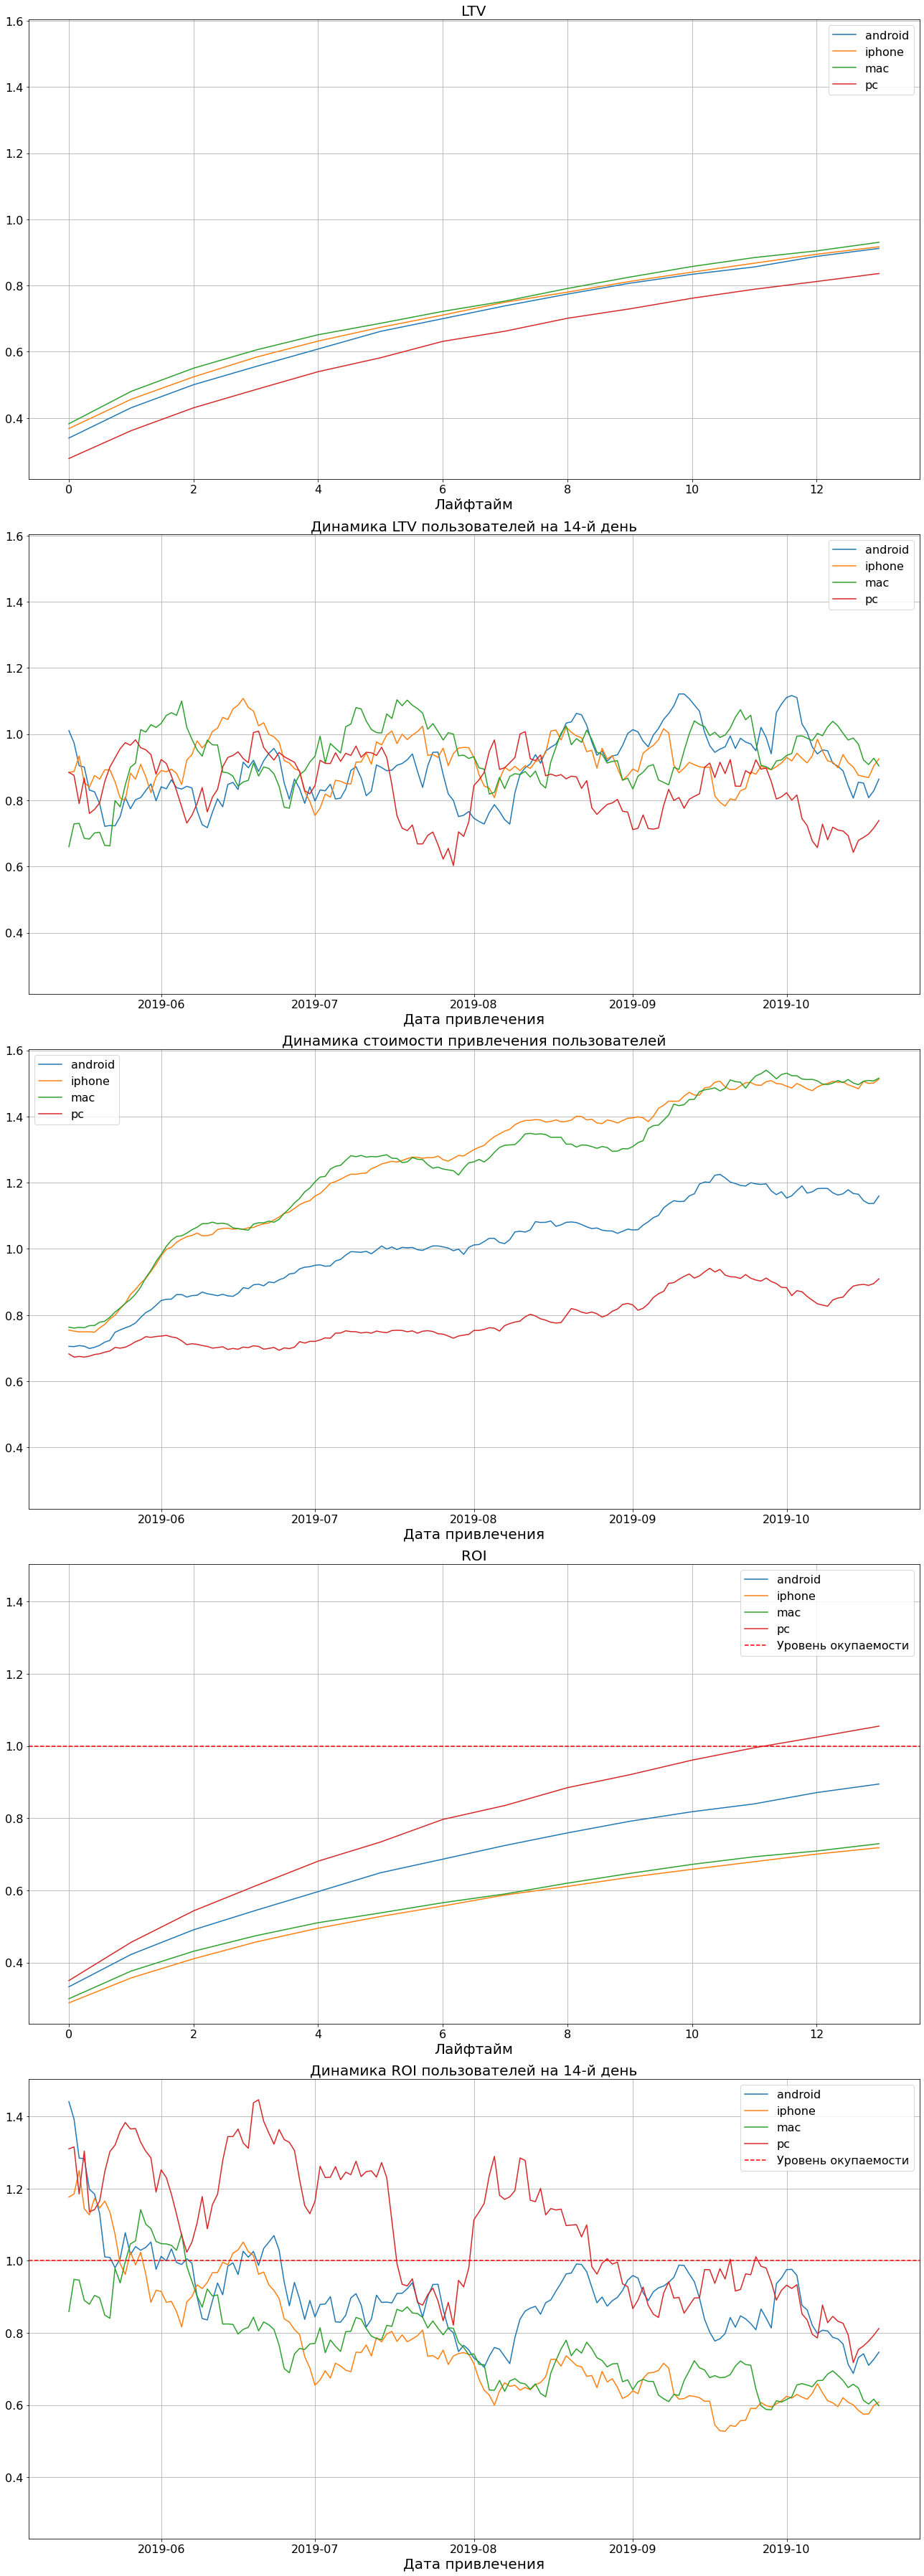

In [77]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days) 

**График LTV.** Пользователи `pc` приносят стабильно денег, чем меньше остальных. Остальные приносят почти поровну.

**График динамики LTV.** График получился малоинформативен из-за близости LTV у владельцев разных устройств.

**График САС.** Здесь сразу бросается в глаза неоднократное резкое повышение САС у ~~источника привлечения `tiptop`~~ США, что однозначно не идёт на пользу приложению. Хоть выше ~~этот канал~~ эта страна и отметилась высоким приростом конверсии, такое большое повышение цены за рекламу не может быть этим оправдано.

**График ROI.** На 8-й день окупаются владельцы `pc`, на 12-й - `android`. Яблочники не окупаются.

**График динамики ROI.** К концу рассматриваемого периода со скрипом остались окупаемыми только владельцы `pc`. Яблочники перестали окупаться ещё в конце июня. А владельцы `android` на протяжении нескольких месяцев были то сверху, то снизу от границы окупаемости.

<a id='s6'></a>
## Шаг 6. Выводы

<a id='s6.1'></a>
#### 6.1 Исходные датасеты

Исходные датасеты были доработаны:
- названия столбцов и содержимое были приведены к змеиному регистру;
- столбцы с датой и временем были приведены к формату `datetime`, а столбец с датой к формату `datetime.date`.

<a id='s6.2'></a>
#### 6.2 Траты

За рассматриваемый период (почти полгода) траты выросли очень сильно (в 3-5 раз). Это представлено на графике.

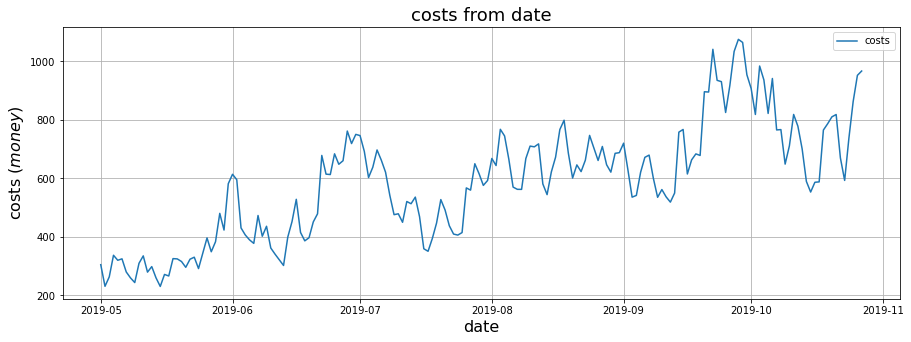

In [78]:
costs.pivot_table(index='dt', values='costs', aggfunc='sum').plot(figsize=(15, 5), grid=True)
plt.xlabel('date', fontsize=16)
plt.ylabel('costs ($money$)', fontsize=16)
plt.title('costs from date', fontsize=18)
plt.show()

Такой рост трат на рекламу является главной проблемой. Этот рост трат прежде всего был обеспечен двумя факторами:
- неоднократным повышением цен за оплату услуг источника привлечения `tiptop`;
- канал `tiptop` на втором месте по привлечённым пользователям, а за каждого привлечённого приходилось платить. 

При окупаемости менее 1 сочетание этих двух факторов крайне невыгодно.

<a id='s6.3'></a>
#### 6.3 Окупаемость

За две недели средний пользователь не успевает окупиться.

Начиная с конца июля окупаемость опустилась ниже 1.

Не окупаются каналы привлечения `tiptop`, `faceboom`, `adnonsense`. От канала `tiptop` нужно отказаться совсем из-за слишком высоких цен на рекламу. Нужно проверить рекламу, которую показывают `faceboom` и `adnonsense`. У этих двух каналов слишком низкое удержание, возможно, вызванное тем, что реклама вводит потенциальных пользователей и привлекает нецелевую аудоторию. В конечном счёте привлечение такой аудитории не является выгодным и грозит, помимо отсутствия окупаемости, плохими отзывами.

Распределение рекламных средств в зависимости от устройства пока что лучше не менять. Этим вопросом лучше заняться после более насущного вопроса с каналами привлечения.

Каналы привлечения для США и Европы разные и не пересекаются. На данный момент США хуже всего окупается (точнее, вообще не окупается), но при этом пользователи из США имеют самую большую LTV. Два из трёх проблемных канала (`faceboom` и `tiptop`) функционируют именно в США. Скорее всего, после решения вопроса с каналами привлечения показатели США значительно улучшатся. 

<a id='s6.4'></a>
#### 6.4 Платящие пользователи

В представленых ниже таблицах показаны проценты платящих пользователей от общего числа пользователей.
Чем выше этот процент, тем **при прочих равных** выгоднее вкладывать деньги именно в эту область (регион/устройство/канал привлечения).

Распределение по регионам:

In [79]:
conclusion_region

,region_payer_percentage
united states,6.90
germany,4.11
uk,3.98
france,3.80


Распределение по устройствам:

In [80]:
conclusion_device

,device_payer_percentage
mac,6.36
iphone,6.21
android,5.85
pc,5.05


Распределение по каналам привлечения:

In [81]:
conclusion_channel

,channel_payer_percentage
faceboom,12.20
adnonsense,11.34
lambdamediaads,10.47
tiptop,9.60
rocketsuperads,7.91
wahoonetbanner,5.30
yrabbit,3.83
mediatornado,3.57
leapbob,3.06
opplecreativemedia,2.71


Обращаю внимание на то, что от канала `tiptop` следует отказаться. Он представлен здесь только для общей картины.